<a href="https://colab.research.google.com/github/victorncg/aulas_palestras/blob/main/Palestra_LMF_UFU_Compara%C3%A7%C3%A3o_de_carteiras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparação de carteiras simples**

# 1. Instalando e importando bibliotecas

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 12.4 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Importando dados

Criação de cesta de ativos que podem ser usados na construção das carteiras

* <b> Fundos imobiliários:</b> MXRF11, XPLG11 e HCTR11

* <b>Ações:</b> BPAN4, VALE3, WEGE3,TOTS3, JHSF3, PRIO3, OIBR3, PETR4, SUZB3, JBSS3, BPAC11, MGLU3, LREN3

* <b>ETFs:</b>
SMAL11, IVVB11

* <b>BDRs:</b>
COCA34, AAPL34, TSLA34, MSBR34, MSFT34, AMZON34

Vamos transformar isso numa lista

In [ ]:
ativos = ['MXRF11', 'XPLG11', 'HCTR11','BPAN4', 'VALE3', 'WEGE3' ,'TOTS3', 'JHSF3' ,'PRIO3', 'OIBR3', 'PETR4' ,'SUZB3' ,'JBSS3',
'BPAC11', 'LREN3', 'SMAL11', 'IVVB11', 'COCA34' ,'AAPL34','TSLA34','MSBR34' ,'MSFT34','AMZO34']

In [ ]:
ativos = [i + '.SA' for i in ativos]

In [ ]:
ativos

['MXRF11.SA',
 'XPLG11.SA',
 'HCTR11.SA',
 'BPAN4.SA',
 'VALE3.SA',
 'WEGE3.SA',
 'TOTS3.SA',
 'JHSF3.SA',
 'PRIO3.SA',
 'OIBR3.SA',
 'PETR4.SA',
 'SUZB3.SA',
 'JBSS3.SA',
 'BPAC11.SA',
 'LREN3.SA',
 'SMAL11.SA',
 'IVVB11.SA',
 'COCA34.SA',
 'AAPL34.SA',
 'TSLA34.SA',
 'MSBR34.SA',
 'MSFT34.SA',
 'AMZO34.SA']

In [ ]:
inicio = '2020-06-01'
fim = '2022-03-10'

In [ ]:
AMZN = yf.download('AMZN', start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed


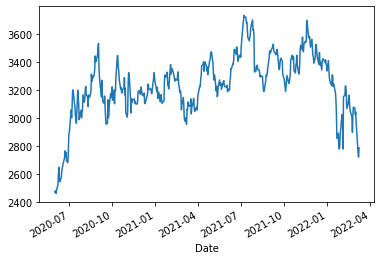

In [ ]:
AMZN.plot();

In [ ]:
precos = yf.download(ativos, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  23 of 23 completed


In [ ]:
precos.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,OIBR3.SA,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-01,42.799931,84.636940,12.160338,5.749840,40.569164,117.809998,177.149994,19.508408,4.476348,39.645496,...,0.80,16.523727,6.258,96.830002,37.996574,20.113428,30.191750,41.981907,20.620480,NaN
2020-06-02,41.642639,82.057327,13.414207,6.650648,38.952755,118.599998,173.500000,19.375156,4.737106,40.748093,...,0.83,17.393398,6.718,101.050003,37.966923,20.418472,29.000000,41.981907,20.747643,NaN
2020-06-03,40.923050,80.342674,14.430398,8.049776,38.978210,119.019997,171.300003,18.300240,4.937021,42.730862,...,0.82,17.450294,6.496,105.199997,37.680347,21.136808,28.100000,42.170528,20.835684,NaN
2020-06-04,40.685658,80.509422,14.612293,8.586428,38.854122,119.320000,171.979996,19.073112,5.206470,43.098392,...,0.83,17.417784,6.784,105.029999,39.380062,21.343452,27.674999,43.742298,21.422602,115.610001
2020-06-05,40.554596,78.917198,14.609870,8.615176,39.041855,120.000000,170.899994,18.611164,5.258623,44.471821,...,0.84,17.962341,7.454,107.790001,37.848339,20.428312,27.599751,42.917114,21.681826,117.360001


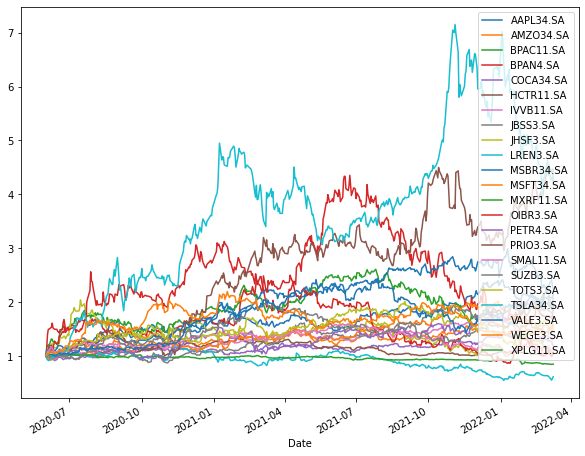

In [ ]:
(precos/precos.iloc[0]).plot(figsize = (10,8));

In [ ]:
precos = precos.dropna()

# 3. Criação da primeira carteira fictícia

Criação de um dicionário que determina as alocações

In [ ]:
precos.columns

Index(['AAPL34.SA', 'AMZO34.SA', 'BPAC11.SA', 'BPAN4.SA', 'COCA34.SA',
       'HCTR11.SA', 'IVVB11.SA', 'JBSS3.SA', 'JHSF3.SA', 'LREN3.SA',
       'MSBR34.SA', 'MSFT34.SA', 'MXRF11.SA', 'OIBR3.SA', 'PETR4.SA',
       'PRIO3.SA', 'SMAL11.SA', 'SUZB3.SA', 'TOTS3.SA', 'TSLA34.SA',
       'VALE3.SA', 'WEGE3.SA', 'XPLG11.SA'],
      dtype='object')

In [ ]:
compras = {
    'AAPL34.SA':14000,
    'BPAC11.SA':8000,
    'COCA34.SA':6000,
    'HCTR11.SA':4000,
    'IVVB11.SA':9000,
    'MSBR34.SA':4000,
    'OIBR3.SA':3000,
    'PETR4.SA':17000,
    'SMAL11.SA': 20000,
    'WEGE3.SA':15000

}

In [ ]:
compras.keys()

dict_keys(['AAPL34.SA', 'BPAC11.SA', 'COCA34.SA', 'HCTR11.SA', 'IVVB11.SA', 'MSBR34.SA', 'OIBR3.SA', 'PETR4.SA', 'SMAL11.SA', 'WEGE3.SA'])

Verificando se o valor estipulado da carteira está correto

In [ ]:
sum(compras.values())

100000

Preço dos ativos no primeiro dia de investimento

In [ ]:
primeiro = precos.iloc[0]

In [ ]:
primeiro

AAPL34.SA     40.685658
AMZO34.SA     80.509422
BPAC11.SA     14.612293
BPAN4.SA       8.586428
COCA34.SA     38.854122
HCTR11.SA    119.320000
IVVB11.SA    171.979996
JBSS3.SA      19.073112
JHSF3.SA       5.206470
LREN3.SA      43.098392
MSBR34.SA     45.336029
MSFT34.SA     38.374866
MXRF11.SA     10.950000
OIBR3.SA       0.830000
PETR4.SA      17.417784
PRIO3.SA       6.784000
SMAL11.SA    105.029999
SUZB3.SA      39.380062
TOTS3.SA      21.343452
TSLA34.SA     27.674999
VALE3.SA      43.742298
WEGE3.SA      21.422602
XPLG11.SA    115.610001
Name: 2020-06-04 00:00:00, dtype: float64

Transformando dicionário de alocações em dataframe

In [ ]:
list(compras.keys())

['AAPL34.SA',
 'BPAC11.SA',
 'COCA34.SA',
 'HCTR11.SA',
 'IVVB11.SA',
 'MSBR34.SA',
 'OIBR3.SA',
 'PETR4.SA',
 'SMAL11.SA',
 'WEGE3.SA']

In [ ]:
compras_df = pd.Series(data = compras, index = list(compras.keys()))

In [ ]:
compras_df

AAPL34.SA    14000
BPAC11.SA     8000
COCA34.SA     6000
HCTR11.SA     4000
IVVB11.SA     9000
MSBR34.SA     4000
OIBR3.SA      3000
PETR4.SA     17000
SMAL11.SA    20000
WEGE3.SA     15000
dtype: int64

Quantidade de papéis comprados de cada ativo

In [ ]:
qtd_acoes = compras_df/primeiro

In [ ]:
qtd_acoes

AAPL34.SA     344.101604
AMZO34.SA            NaN
BPAC11.SA     547.484222
BPAN4.SA             NaN
COCA34.SA     154.423769
HCTR11.SA      33.523299
IVVB11.SA      52.331668
JBSS3.SA             NaN
JHSF3.SA             NaN
LREN3.SA             NaN
MSBR34.SA      88.230048
MSFT34.SA            NaN
MXRF11.SA            NaN
OIBR3.SA     3614.457904
PETR4.SA      976.013955
PRIO3.SA             NaN
SMAL11.SA     190.421786
SUZB3.SA             NaN
TOTS3.SA             NaN
TSLA34.SA            NaN
VALE3.SA             NaN
WEGE3.SA      700.195065
XPLG11.SA            NaN
dtype: float64

In [ ]:
qtd_acoes = round(qtd_acoes,0)

In [ ]:
qtd_acoes

AAPL34.SA     344.0
AMZO34.SA       NaN
BPAC11.SA     547.0
BPAN4.SA        NaN
COCA34.SA     154.0
HCTR11.SA      34.0
IVVB11.SA      52.0
JBSS3.SA        NaN
JHSF3.SA        NaN
LREN3.SA        NaN
MSBR34.SA      88.0
MSFT34.SA       NaN
MXRF11.SA       NaN
OIBR3.SA     3614.0
PETR4.SA      976.0
PRIO3.SA        NaN
SMAL11.SA     190.0
SUZB3.SA        NaN
TOTS3.SA        NaN
TSLA34.SA       NaN
VALE3.SA        NaN
WEGE3.SA      700.0
XPLG11.SA       NaN
dtype: float64

In [ ]:
PL = precos*qtd_acoes

In [ ]:
PL.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,OIBR3.SA,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,13995.866180,NaN,7992.924404,NaN,5983.534813,4056.879990,8942.959778,NaN,NaN,NaN,...,2999.619940,16999.756927,NaN,19955.699768,NaN,NaN,NaN,NaN,14995.821190,NaN
2020-06-05,13950.781006,NaN,7991.598866,NaN,6012.445648,4080.000000,8886.799683,NaN,NaN,NaN,...,3035.759905,17531.245117,NaN,20480.100174,NaN,NaN,NaN,NaN,15177.277946,NaN
2020-06-08,13796.810089,NaN,8758.388247,NaN,5941.393127,4079.659927,8788.000000,NaN,NaN,NaN,...,3108.040052,17872.355896,NaN,21466.200638,NaN,NaN,NaN,NaN,15680.563164,NaN
2020-06-09,14244.256531,NaN,8700.018161,NaN,5840.451057,4065.720062,8795.799683,NaN,NaN,NaN,...,3324.880060,17229.804443,NaN,21053.899536,NaN,NaN,NaN,NaN,15683.986473,NaN
2020-06-10,14769.111633,NaN,8405.505702,NaN,5880.141258,4079.659927,8866.519714,NaN,NaN,NaN,...,3288.740095,16975.956726,NaN,20348.999710,NaN,NaN,NaN,NaN,15403.241730,NaN


In [ ]:
PL['PL Total'] = PL.sum(axis = 1)

In [ ]:
PL.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA,PL Total
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,13995.866180,NaN,7992.924404,NaN,5983.534813,4056.879990,8942.959778,NaN,NaN,NaN,...,16999.756927,NaN,19955.699768,NaN,NaN,NaN,NaN,14995.821190,NaN,99912.633547
2020-06-05,13950.781006,NaN,7991.598866,NaN,6012.445648,4080.000000,8886.799683,NaN,NaN,NaN,...,17531.245117,NaN,20480.100174,NaN,NaN,NaN,NaN,15177.277946,NaN,101333.037094
2020-06-08,13796.810089,NaN,8758.388247,NaN,5941.393127,4079.659927,8788.000000,NaN,NaN,NaN,...,17872.355896,NaN,21466.200638,NaN,NaN,NaN,NaN,15680.563164,NaN,103607.233955
2020-06-09,14244.256531,NaN,8700.018161,NaN,5840.451057,4065.720062,8795.799683,NaN,NaN,NaN,...,17229.804443,NaN,21053.899536,NaN,NaN,NaN,NaN,15683.986473,NaN,103054.638822
2020-06-10,14769.111633,NaN,8405.505702,NaN,5880.141258,4079.659927,8866.519714,NaN,NaN,NaN,...,16975.956726,NaN,20348.999710,NaN,NaN,NaN,NaN,15403.241730,NaN,102133.699311


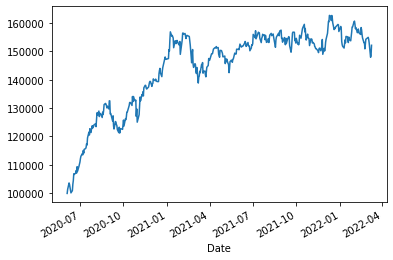

In [ ]:
PL['PL Total'].plot();

# 4. Comparando nossa carteira com o Ibov

In [ ]:
ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov.rename(columns={'Adj Close': 'IBOV'}, inplace = True)

In [ ]:
ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1, inplace = True)

In [ ]:
ibov.head()

,IBOV
Date,
2020-06-01,88620.0
2020-06-02,91046.0
2020-06-03,93002.0
2020-06-04,93829.0
2020-06-05,94637.0


In [ ]:
consolidado = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [ ]:
consolidado.head()

,IBOV,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,...,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA,PL Total
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,93829.0,13995.866180,NaN,7992.924404,NaN,5983.534813,4056.879990,8942.959778,NaN,NaN,...,16999.756927,NaN,19955.699768,NaN,NaN,NaN,NaN,14995.821190,NaN,99912.633547
2020-06-05,94637.0,13950.781006,NaN,7991.598866,NaN,6012.445648,4080.000000,8886.799683,NaN,NaN,...,17531.245117,NaN,20480.100174,NaN,NaN,NaN,NaN,15177.277946,NaN,101333.037094
2020-06-08,97645.0,13796.810089,NaN,8758.388247,NaN,5941.393127,4079.659927,8788.000000,NaN,NaN,...,17872.355896,NaN,21466.200638,NaN,NaN,NaN,NaN,15680.563164,NaN,103607.233955
2020-06-09,96747.0,14244.256531,NaN,8700.018161,NaN,5840.451057,4065.720062,8795.799683,NaN,NaN,...,17229.804443,NaN,21053.899536,NaN,NaN,NaN,NaN,15683.986473,NaN,103054.638822
2020-06-10,94686.0,14769.111633,NaN,8405.505702,NaN,5880.141258,4079.659927,8866.519714,NaN,NaN,...,16975.956726,NaN,20348.999710,NaN,NaN,NaN,NaN,15403.241730,NaN,102133.699311


Normalizando os dados para ajustar a escala

In [ ]:
consolidado_adj = consolidado/consolidado.iloc[0]

In [ ]:
consolidado_adj.tail()

,IBOV,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,...,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA,PL Total
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-03,1.227403,2.042243,NaN,1.688304,NaN,1.330079,1.032937,1.392022,NaN,NaN,...,1.965807,NaN,1.066362,NaN,NaN,NaN,NaN,1.458740,NaN,1.544055
2022-03-04,1.220028,2.022334,NaN,1.630134,NaN,1.341316,1.029165,1.390278,NaN,NaN,...,1.965233,NaN,1.053985,NaN,NaN,NaN,NaN,1.470876,NaN,1.531610
2022-03-07,1.189323,1.988907,NaN,1.574017,NaN,1.322928,1.024891,1.360623,NaN,NaN,...,1.825720,NaN,1.009235,NaN,NaN,NaN,NaN,1.450804,NaN,1.480695
2022-03-08,1.185167,1.954989,NaN,1.632872,NaN,1.262144,1.025562,1.339691,NaN,NaN,...,1.863612,NaN,1.021042,NaN,NaN,NaN,NaN,1.473677,NaN,1.488093
2022-03-09,1.213910,2.015206,NaN,1.710888,NaN,1.251418,1.010141,1.360623,NaN,NaN,...,1.869354,NaN,1.057793,NaN,NaN,NaN,NaN,1.525025,NaN,1.523109


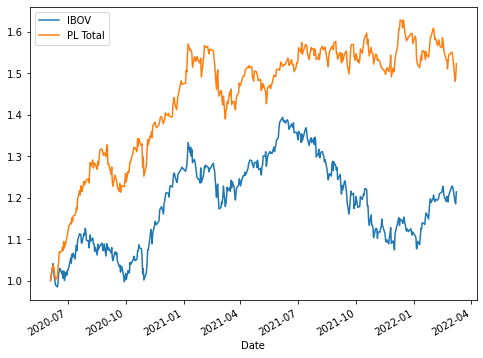

In [ ]:
consolidado_adj[['IBOV', 'PL Total']].plot(figsize = (8,6))

# 5. Construção de novas carteiras

## 5.1. Carteira 02

In [ ]:
compras02 = {
    'AAPL34.SA':14000,
    'BPAC11.SA':8000,
    'OIBR3.SA':3000,
    'PETR4.SA':17000,
    'SMAL11.SA': 20000,
    'WEGE3.SA':15000

}

In [ ]:
sum(compras02.values())

77000

In [ ]:
primeiro02 = precos.iloc[0]

compras_df02 = pd.Series(data = compras02, index = list(compras02.keys()))

qtd_acoes02 = compras_df02/primeiro02

qtd_acoes02 = round(qtd_acoes02,0)

PL02 = precos*qtd_acoes02

PL02['PL Total'] = PL02.sum(axis = 1)

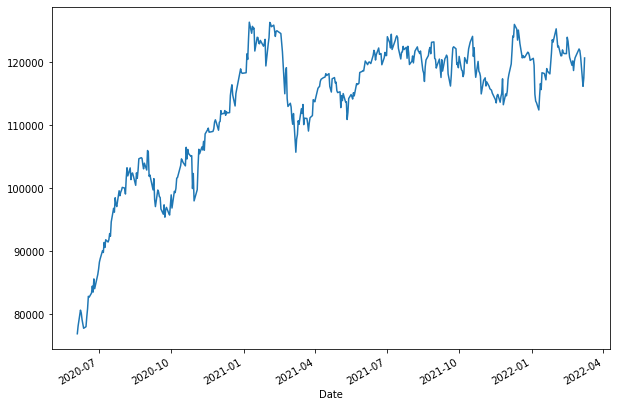

In [ ]:
PL02['PL Total'].plot();

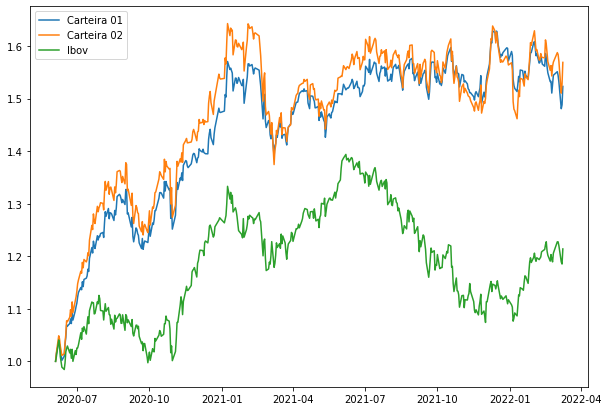

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)

plt.plot(consolidado_adj['PL Total'])

plt.plot(PL02['PL Total']/PL02['PL Total'].iloc[0])

plt.plot(consolidado_adj['IBOV'])

# Criar lista com nomes dos portfólios e benchmarks a serem plotados
nomes = ['Carteira 01', 'Carteira 02', 'Ibov']

plt.legend(nomes);

plt.show()

# 6. Criação de funções para agilizar o processo

In [ ]:
compras03 = {
    'AAPL34.SA':14000,
    'OIBR3.SA':15000,
    'PETR4.SA':17000,
    'WEGE3.SA':15000,
    'TSLA34.SA': 5000

}

In [ ]:
def cria_carteiras(cotacoes, alocacoes):
  
  alocacoes_df = pd.Series(data = alocacoes, index = list(alocacoes.keys()))

  primeiro02 = cotacoes.iloc[0]

  PL_carteira = cotacoes*(round(alocacoes_df/primeiro02,0))

  PL_carteira['PL Total'] = PL_carteira.sum(axis = 1)

  df_normalizado = PL_carteira/PL_carteira.iloc[0]

  carteira_final = df_normalizado['PL Total']

  return carteira_final;

In [ ]:
carteira03 = cria_carteiras(precos,compras03)

In [ ]:
carteira03.head()

Date
2020-06-04    1.000000
2020-06-05    1.012651
2020-06-08    1.031653
2020-06-09    1.046159
2020-06-10    1.049581
Name: PL Total, dtype: float64

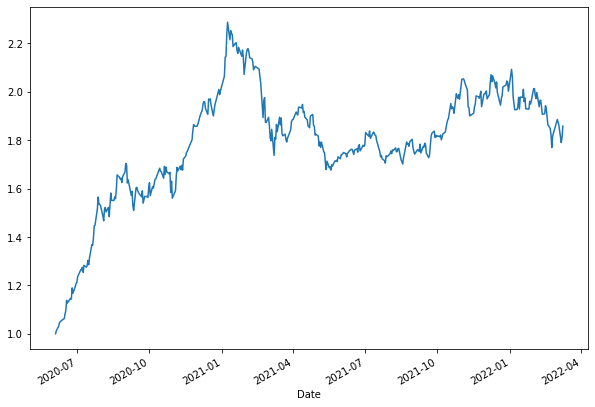

In [ ]:
carteira03.plot();

### Verificando visualmente

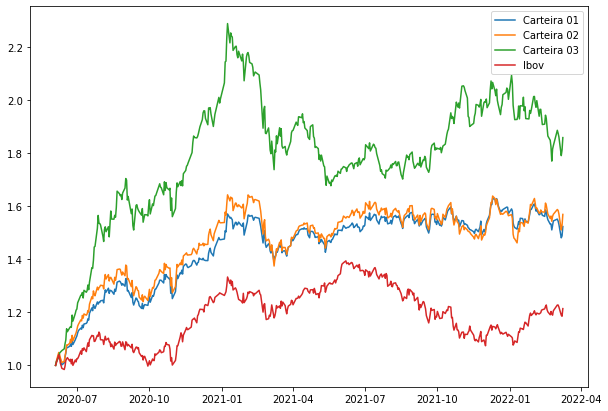

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)

plt.plot(consolidado_adj['PL Total'])

plt.plot(PL02['PL Total']/PL02['PL Total'].iloc[0])

plt.plot(carteira03)

plt.plot(consolidado_adj['IBOV'])

nomes = ['Carteira 01', 'Carteira 02', 'Carteira 03' ,'Ibov']

plt.legend(nomes);

plt.show()

In [ ]:
carteira01 = consolidado_adj['PL Total']

carteira02 =   PL02['PL Total']/PL02['PL Total'].iloc[0]

In [ ]:
carteiras = [carteira01, carteira02, carteira03]

nomes = ['Carteira 01', 'Carteira 02', 'Carteira 03' ,'S&P 500']

In [ ]:
def compara_carteiras(portfolios, benchmark, start, end, legenda):

  import matplotlib.pyplot as plt

  plt.rcParams["figure.figsize"] = (10,7)

  bench = yf.download(benchmark, start = inicio, end = fim, progress = False)['Adj Close']

  bench_norm = bench/bench.iloc[0]

  # plot das carteiras
  for portfolio in portfolios:
    plt.plot(portfolio)

  plt.plot(bench_norm)

  plt.legend(legenda);

  plt.show()

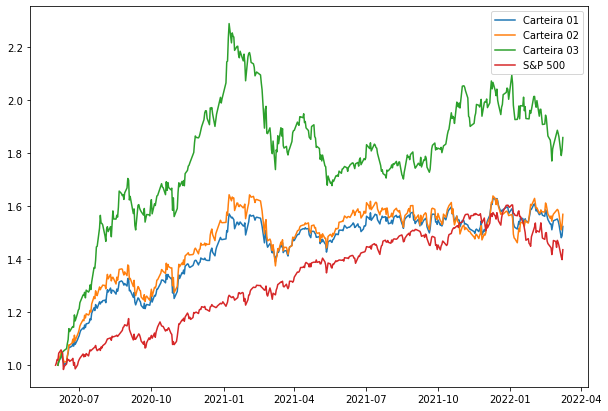

In [ ]:
compara_carteiras(carteiras, 'SPY', inicio, fim, nomes)

# 7. Teste das novas funções

In [ ]:
compras04 = {
    'AAPL34.SA':14000,
    'BPAN4.SA':15000,
    'PETR4.SA':17000,
    'WEGE3.SA':15000,
    'PRIO3.SA': 5000

}

In [ ]:
carteira04 = cria_carteiras(precos,compras04)

In [ ]:
carteira04.head()

Date
2020-06-04    1.000000
2020-06-05    1.018364
2020-06-08    1.034355
2020-06-09    1.038042
2020-06-10    1.019356
Name: PL Total, dtype: float64

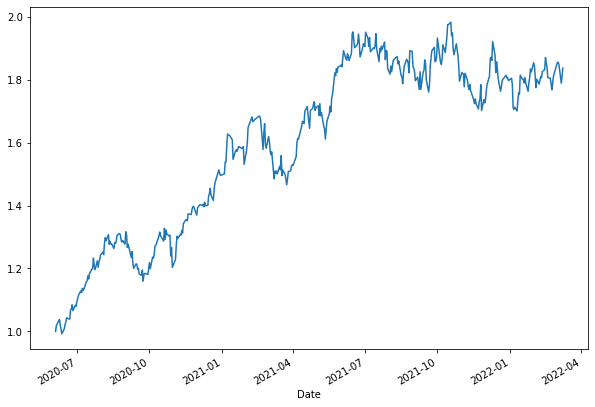

In [ ]:
carteira04.plot()

In [ ]:
carteiras = [carteira01, carteira02, carteira03, carteira04]

nomes = ['Carteira 01', 'Carteira 02', 'Carteira 03', 'Carteira 04' ,'S&P 500']

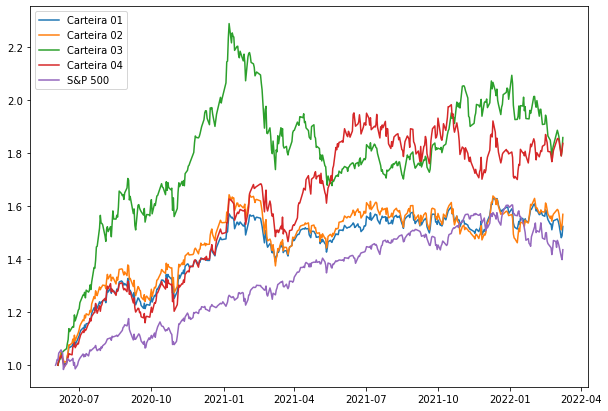

In [ ]:
compara_carteiras(carteiras, 'SPY', inicio, fim, nomes)